In [2]:
import tensorflow as tf

import os

os.environ["CUDA_VISIBLE_DEVICES"]="0"

# Tutorial on the book

In [3]:
# make list of tfrecords
number_tfrecord_files = 10
# get data of mnist
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets('mnist/')

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


In [5]:
train_images = mnist.train.images

In [6]:
number_data_per_file = int(train_images.shape[0] / number_tfrecord_files)

In [7]:
def _float64list(value):
    return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))
def _byteslist(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

In [22]:
index = 0
for each_file in range(number_tfrecord_files):
    path = 'mnist/data/train.tfrecords-%.5d-%.5d' % (each_file, number_tfrecord_files)
    writer = tf.python_io.TFRecordWriter(path)
    for each_data in range(number_data_per_file):
        example = tf.train.Example(features=tf.train.Features(feature={
            'image': _byteslist(train_images[index].tostring())
        }))
        writer.write(example.SerializeToString())
        index += 1
    writer.close()

In [23]:
type(train_images[0])

numpy.ndarray

# bug: only length-1 arrays can be converted to Python scalars
1. Reason: making an numpy array to write to a float number.
2. Solutions: For images converting to tfrecords, it is better to use bytes.

In [24]:
# read tfrecords
reader = tf.TFRecordReader()

In [25]:
filenames = tf.train.match_filenames_once('mnist/data/train.tfrecords-*')

In [26]:
filequeue = tf.train.string_input_producer(filenames)

In [27]:
_, serialized_example = reader.read(filequeue)

In [28]:
with tf.Session() as sess:
    # initialize local variable
    tf.local_variables_initializer().run()
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess, coord)
    images_list = []
    for _ in range(100):
        image = tf.parse_single_example(serialized_example, features={
            'image': tf.FixedLenFeature([], tf.string)
        })
        images_list.append(sess.run(tf.decode_raw(image['image'], tf.float32)))
    coord.request_stop()
    coord.join(threads)

# error: Expected string, got {'image': <tf.Tensor 'ParseSingleExample/Squeeze_image:0' shape=() dtype=string>} of type 'dict' instead.
1. reason: the tf.parse_single_example returns a dict.

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

# Idea: how to show images one by one in a loop

In [30]:
import numpy as np

In [31]:
def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

In [32]:
new_images = [newimage.reshape((28, 28)) for newimage in images_list]

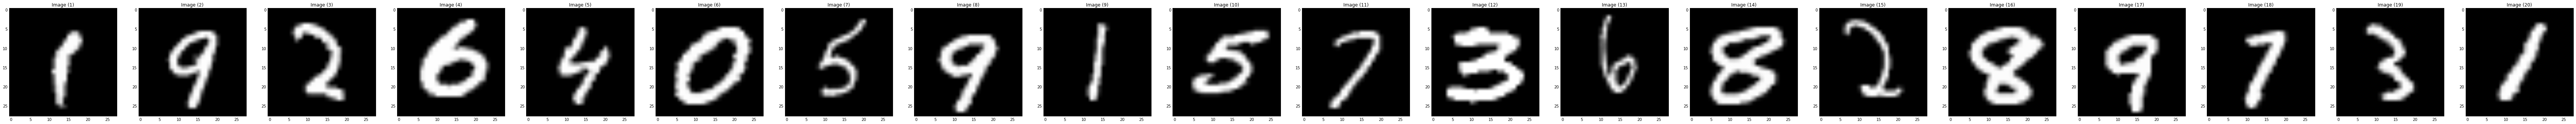

In [33]:
show_images(new_images[:20])